<a href="https://colab.research.google.com/github/Nishidh25/IEEE-Coders-Week---ML/blob/master/Day%204/Clustering_Wholesale_customers_data_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do unsupervised learning on this given dataset

# Dataset 

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Attribute Information:

1.	FRESH: annual spending (m.u.) on fresh products (Continuous); 

2.	MILK: annual spending (m.u.) on milk products (Continuous); 

3.	GROCERY: annual spending (m.u.)on grocery products (Continuous); 

4.	FROZEN: annual spending (m.u.)on frozen products (Continuous) 

5.	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products 
(Continuous) 
6.	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

7.	CHANNEL: customersÃ¢â‚¬â„¢ Channel - Horeca (Hotel/Restaurant/CafÃƒÂ©) or Retail channel (Nominal) 

8.	REGION: customersÃ¢â‚¬â„¢ Region Ã¢â‚¬â€œ Lisnon, Oporto or Other (Nominal) 

Source: UCI Wholesale customers Data Set (https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

In [1]:
!wget http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv

--2020-06-05 12:40:39--  http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [text/plain]
Saving to: ‘Wholesale customers data.csv.1’

Wholesale customers 100%[===================>]  14.67K  65.6KB/s    in 0.2s    

2020-06-05 12:40:40 (65.6 KB/s) - ‘Wholesale customers data.csv.1’ saved [15021/15021]



# Imports

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploring Data

In [3]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
#!pip install -U pandas-profiling
#df.profile_report()

## Standardize Data

In [0]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## Linear dimensionality reduction 
(6 to 2)

Using Singular Value Decomposition of the data to project it to a lower dimensional space.

Principal component analysis (PCA)

In [0]:
PCA_train = PCA(2).fit_transform(scaled_df)
ps = PCA_train 

# Finding Clusters
* Elbow Method
* Silhouette Method

## Elbow Method
Finding optimal value of K-Clusters using Elbow Method

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

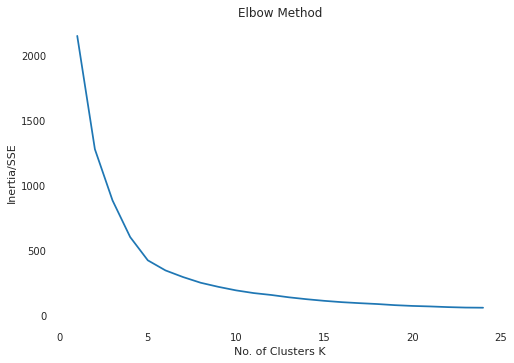

<Figure size 720x360 with 0 Axes>

In [8]:
inertia = []
for i in range(1, 25):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    km.fit(ps)
    inertia.append(km.inertia_)
plt.plot(range(1, 25), inertia)
plt.title("Elbow Method")
plt.xlabel('No. of Clusters K')
plt.ylabel('Inertia/SSE')
plt.figure(figsize = (10,5))
plt.show()

We can see the elbow at K = 5 

## Silhouette Method
Finding optimal value of K-Clusters using silhouette score

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

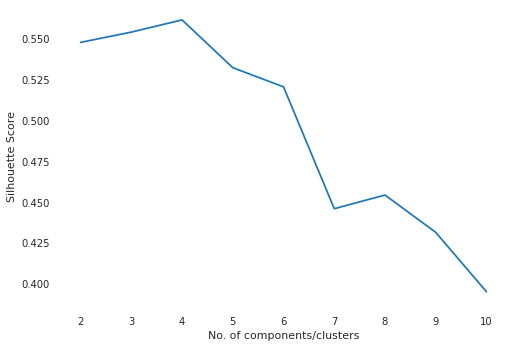

<Figure size 720x360 with 0 Axes>

In [9]:
sil_score = []
kmax = 10

# Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(ps)
  labels = kmeans.labels_
  sil_score.append(silhouette_score(ps, labels, metric = 'euclidean'))

plt.plot(range(2, kmax+1), sil_score)
plt.xlabel('No. of components/clusters')
plt.ylabel('Silhouette Score')
plt.figure(figsize = (10,5))
plt.show()

k = 4 according to score

# Models
* K-Means
* Gaussiam Mixture

## K-Means Model

In [0]:
model = KMeans(n_clusters = 5, # Chosen from elbow method
               algorithm = 'full',
               init = 'k-means++', 
               precompute_distances = 'auto') 
fitted = model.fit(ps)
prediction = fitted.predict(ps)

Plotting 

In [0]:
def kmeans_plot(fitted, prediction ):
  plt.figure(figsize = (10,8))
  plt.scatter(ps[:, 0], ps[:, 1], c = prediction , s=45,cmap='viridis')
  centers = fitted.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.6);
  plt.axis('equal')
  plt.show()

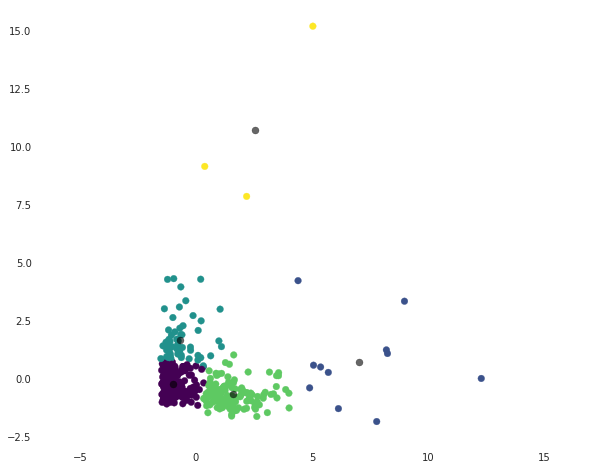

In [12]:
kmeans_plot(fitted, prediction)

In [13]:
fitted.score(ps)

-421.3146175003159

### Hyper patamerter tuning

In [14]:
model.get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'n_jobs', 'precompute_distances', 'random_state', 'tol', 'verbose'])

In [15]:
param_grid = [
    { 'n_clusters' : [5],
    'algorithm' : ['auto', 'full', 'elkan'],
    'init' : ['k-means++', 'random'],
    'precompute_distances' : ['auto'],
     'tol' : [0.01, 0.0001, 0.00001, 0.01]
     }
]

model_sel = GridSearchCV(estimator= KMeans(n_clusters=5), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_model = model_sel.fit(ps)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.7s finished


In [16]:
best_params = best_model.best_params_
print(best_params)
print("Score",best_model.score(ps))

{'algorithm': 'full', 'init': 'random', 'n_clusters': 5, 'precompute_distances': 'auto', 'tol': 0.01}
Score -421.32676293333384


**Hyper parameter tuning does not have any/much impact on our model**

K-Means Results

In [17]:
print('SSE: ', fitted.inertia_) # - fitted.score(ps)
df['cluster'] = prediction
print('\nCount in each cluster: \n', df['cluster'].value_counts())

SSE:  421.3146175003159

Count in each cluster: 
 0    240
3    124
2     62
1     11
4      3
Name: cluster, dtype: int64


## Gaussian Mixture Model 

Uses Expectation Maximization E-M algorithm

In [0]:
n_components = 4 # Clusters , chosing form sihouette score rather than elbow method

model_gmm = GaussianMixture(n_components = n_components, covariance_type='full').fit(ps)
prediction_gmm = model_gmm.predict(ps)
probs = model_gmm.predict_proba(ps)

Plotting

In [0]:
def gmm_plot(prediction_gmm, probs):
  centers = np.zeros((n_components,2))
  for i in range(n_components):
      density = mvn(cov=model_gmm.covariances_[i], mean=model_gmm.means_[i]).logpdf(ps)
      centers[i, :] = ps[np.argmax(density)]
  plt.figure(figsize = (10,8))
  plt.scatter(ps[:, 0], ps[:, 1],c=prediction_gmm ,s=45, cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1],c='black', s=50, alpha=0.6)
  plt.show()

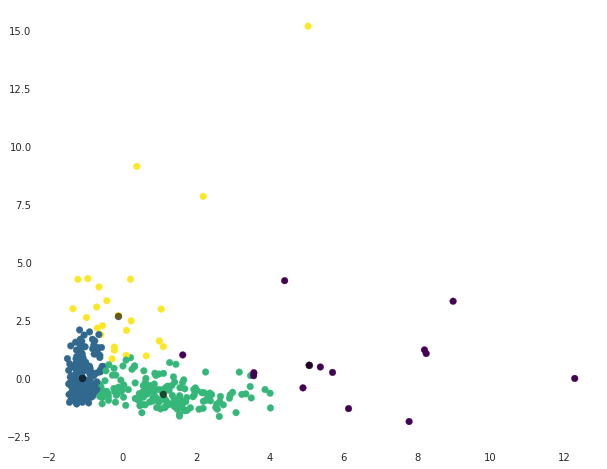

In [20]:
gmm_plot(prediction_gmm, probs)

GMM Results

In [21]:
print("\nMeans: ", model_gmm.means_)
print("\nCovariance: ", model_gmm.covariances_)


Means:  [[ 4.94356583  0.59645783]
 [-1.11622865  0.01302162]
 [ 0.9966931  -0.59766995]
 [-0.06889771  2.91715069]]

Covariance:  [[[10.36896197 -0.24760496]
  [-0.24760496  2.17464311]]

 [[ 0.04418118  0.03442112]
  [ 0.03442112  0.45650119]]

 [[ 1.34723988 -0.18129448]
  [-0.18129448  0.2860936 ]]

 [[ 1.57083827  2.75920298]
  [ 2.75920298  9.71744462]]]


# Implemented Unsupervised Learning on the dataset using 2 models

## K-Means with 5 Clusters

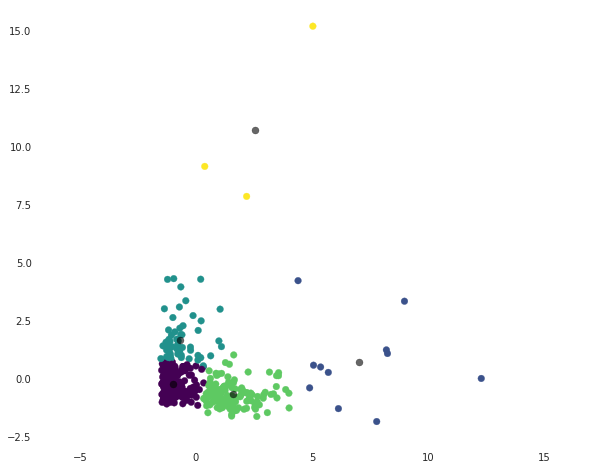

In [22]:
kmeans_plot(fitted, prediction)

## GMM with 4 Clusters

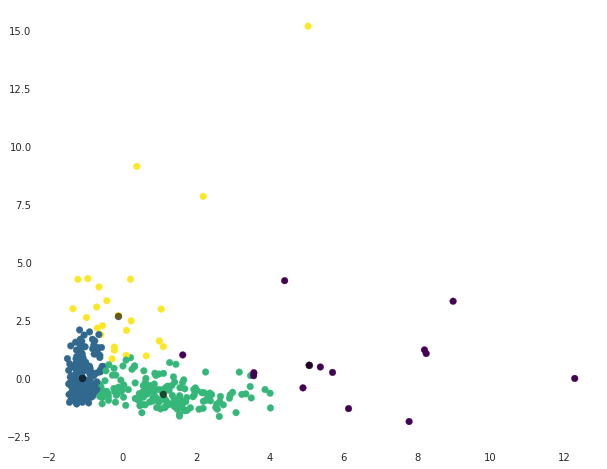

In [23]:
gmm_plot(prediction_gmm, probs)